In [1]:
import sys
from pandas import read_excel, to_datetime
import seaborn as sb
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/연구과제데이터/covid19_full.xlsx')
origin

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [11]:
origin.head()

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784


1. 사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.

In [13]:
# input, date

date = list(input('날짜를 입력하세요: (ex) 20240111'))
datetxt = '{0}-{1}-{2}'
year = date[0:4]
month = date[4:6]
day = date[6:8]

empty=""
yeartxt=empty.join(year)
monthtxt=empty.join(month)
daytxt=empty.join(day)
daytotxt=int(daytxt)+6
#print(datetxt.format(yeartxt,monthtxt,daytxt))
target_date= datetxt.format(yeartxt,monthtxt,daytxt)
target_todate=datetxt.format(yeartxt,monthtxt,daytotxt)

# 불필요한 변환
# origin['날짜']=pd.to_datetime(origin['날짜'],format='%Y-%m-%d')

df = origin.query('@target_date <= 날짜 <= @target_todate')
df = df.astype({'날짜':'str'}).sort_values('날짜')
df

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
115,2023-02-05,5878067,2299.0,0,NaN,NaN,6276,4.0,30257411.0,14018.0,0,NaN,22.0,33596
114,2023-02-06,5878882,815.0,0,NaN,NaN,6279,3.0,30263261.0,5850.0,0,NaN,18.0,33614
113,2023-02-07,5881928,3046.0,0,NaN,NaN,6281,2.0,30279381.0,16120.0,0,NaN,10.0,33624
112,2023-02-08,5884832,2904.0,0,NaN,NaN,6285,4.0,30297315.0,17934.0,0,NaN,22.0,33646
111,2023-02-09,5887292,2460.0,0,NaN,NaN,6293,8.0,30311979.0,14664.0,0,NaN,34.0,33680
110,2023-02-10,5889662,2370.0,0,NaN,NaN,6295,2.0,30325483.0,13504.0,0,NaN,17.0,33697
109,2023-02-11,5891954,2292.0,0,NaN,NaN,6297,2.0,30338148.0,12805.0,0,NaN,16.0,33713


2. 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.

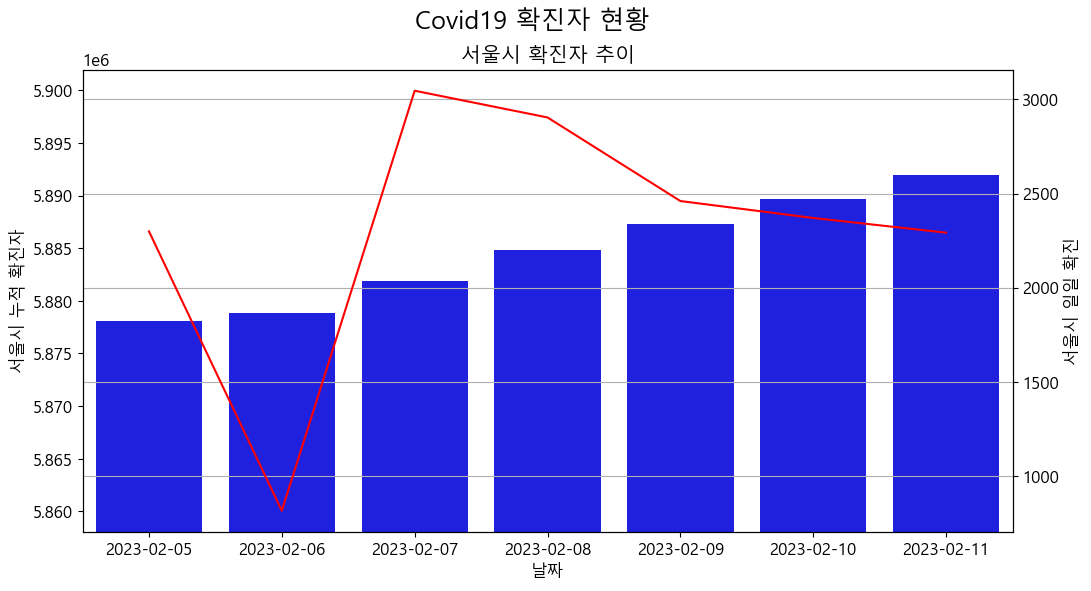

In [14]:
fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

sb.lineplot(data=df, x='날짜', y='서울시 일일 확진', color='#ff0000',ax=ax2)
sb.barplot(data=df, x='날짜', y='서울시 누적 확진자', color='#0000ff',ax=ax1)

fig.suptitle('Covid19 확진자 현황', fontsize=18, color='#000000')


plt.title('서울시 확진자 추이')

start = min(df['서울시 누적 확진자'])
# #print(start)

end = max(df['서울시 누적 확진자'])
# #print(end)
# yt = ax1.set_yticks(list(range(start, end+1)))
# ax1.set_yticklabels(df['서울시 누적 확진자'])

ax1.set_ylim(start-20000,end+10000)


plt.grid()
plt.show()
plt.close()

30257411.0


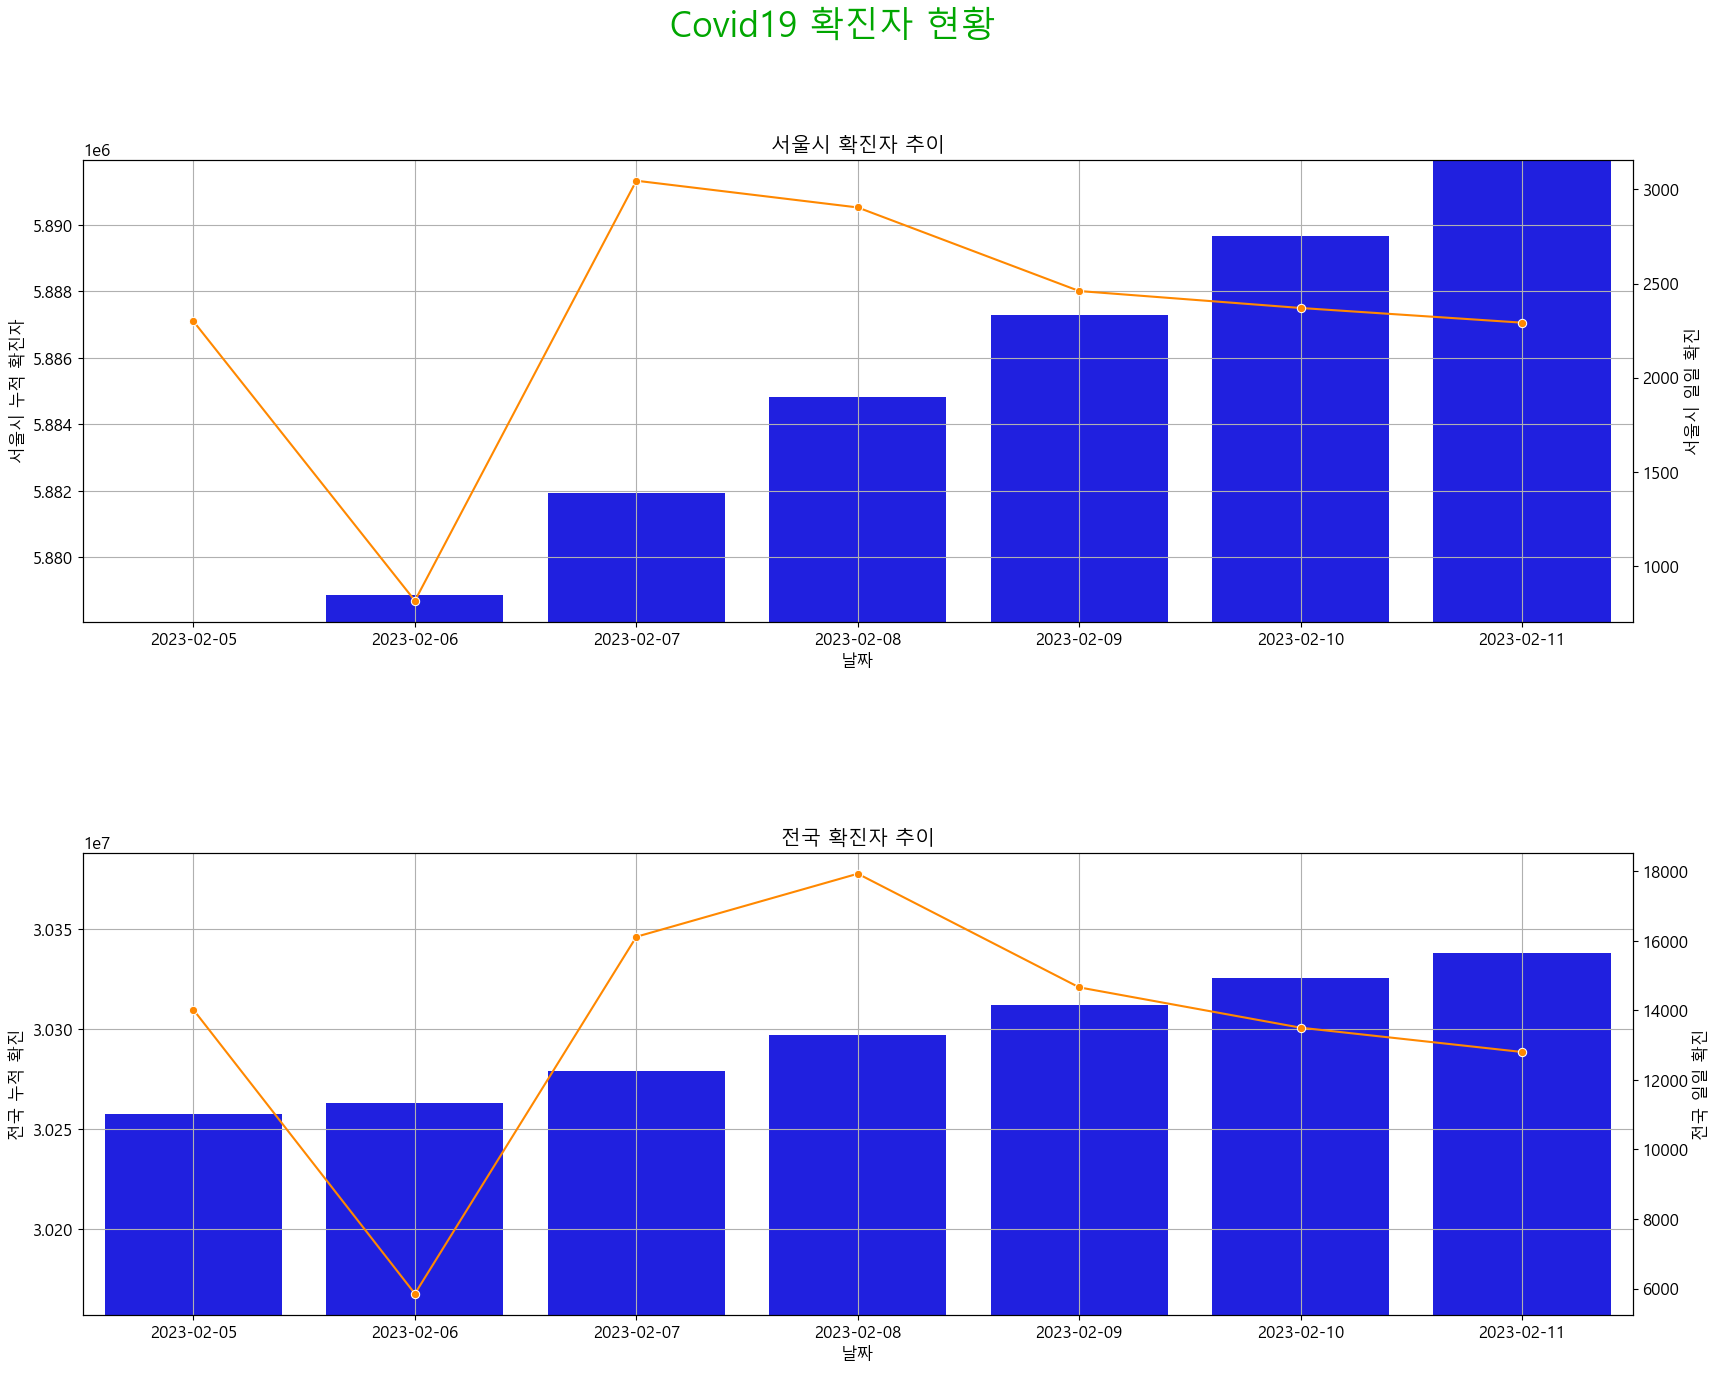

In [19]:
fig, (ax3,ax5) = plt.subplots(2, 1,figsize=(20,15))
ax4 = ax3.twinx()
ax6 = ax5.twinx()

sb.lineplot(data=df, x='날짜', y='서울시 일일 확진', color='#ff8800',marker='o',ax=ax4)
sb.barplot(data=df, x='날짜', y='서울시 누적 확진자', color='#0000ff',ax=ax3)

fig.suptitle('Covid19 확진자 현황', fontsize=25, color='#00a600')
fig.subplots_adjust(wspace=0.3,hspace=0.5)

ax3.title.set_text('서울시 확진자 추이')

start = min(df['서울시 누적 확진자'])
# #print(start)

end = max(df['서울시 누적 확진자'])
# #print(end)
# yt = ax1.set_yticks(list(range(start, end+1)))
# ax1.set_yticklabels(df['서울시 누적 확진자'])

ax3.set_ylim(start,end)

sb.lineplot(data=df, x='날짜', y='전국 일일 확진', color='#ff8800',marker='o',ax=ax6)
sb.barplot(data=df, x='날짜', y='전국 누적 확진', color='#0000ff',ax=ax5)

start2 = min(df['전국 누적 확진'])
print(start2)

end2 = max(df['전국 누적 확진'])
ax5.title.set_text('전국 확진자 추이')
ax5.set_ylim(start2-100000,end2+50000)

ax3.grid()
ax5.grid()

plt.show()
plt.close()
